In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
bars = pd.read_csv("hour6.csv")
prices = bars.pivot(index="CloseTime", columns = "Symbol", values="Close")
prices.index = pd.to_datetime(prices.index)
returns = prices.pct_change().dropna()


In [46]:
sims = {}
window = 10
for idx in range(window, returns.shape[0]):
    df_ = returns.iloc[idx-window:idx]
    mean = df_.mean()
    cov = df_.cov()
    rand = np.random.multivariate_normal(mean, cov, size=(10,)).mean(axis=0)
    sims[df_.index[-1]] = rand
sims = pd.DataFrame(sims).T
sims.columns = returns.columns

In [47]:
sims.corr()

Symbol,ADAUSDT,BTCUSDT,DOGEUSDT,ETHUSDT,LINKUSDT
Symbol,,,,,
ADAUSDT,1.000000,0.766856,0.754939,0.778961,0.802310
BTCUSDT,0.766856,1.000000,0.773339,0.908449,0.790370
DOGEUSDT,0.754939,0.773339,1.000000,0.782078,0.732009
ETHUSDT,0.778961,0.908449,0.782078,1.000000,0.817897
LINKUSDT,0.802310,0.790370,0.732009,0.817897,1.000000


In [48]:
returns.corr()

Symbol,ADAUSDT,BTCUSDT,DOGEUSDT,ETHUSDT,LINKUSDT
Symbol,,,,,
ADAUSDT,1.000000,0.765559,0.741743,0.787285,0.797838
BTCUSDT,0.765559,1.000000,0.729587,0.899889,0.793004
DOGEUSDT,0.741743,0.729587,1.000000,0.745219,0.724477
ETHUSDT,0.787285,0.899889,0.745219,1.000000,0.819501
LINKUSDT,0.797838,0.793004,0.724477,0.819501,1.000000


<AxesSubplot:xlabel='CloseTime'>

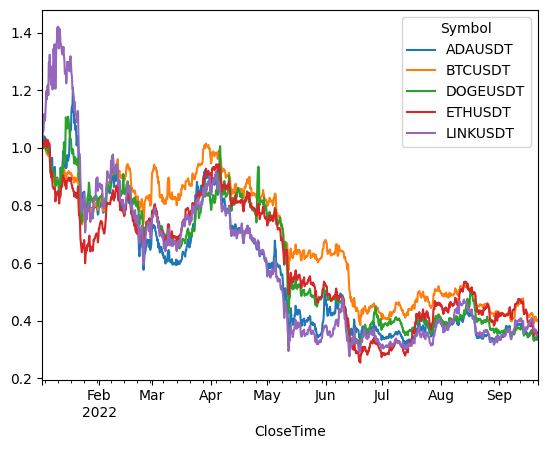

In [49]:
(1.0 + returns).cumprod().plot()

<AxesSubplot:>

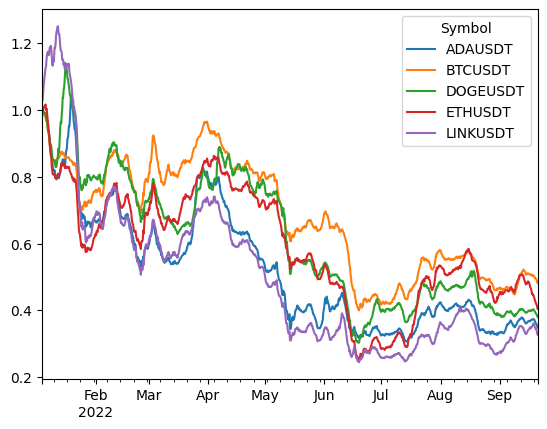

In [51]:
(1.0 + sims).cumprod().plot()

In [52]:
?np.random.multivariate_normal